<a href="https://colab.research.google.com/github/bharti237/jupyterlab/blob/main/stock_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BHARAT INTERN
# NAME- BHARTI

# TASK 1 =  GOOGLE STOCK PREDICTION

## In This task we will predict the variation in stock price from high to low . In this we use Lstm  Time series

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplot  inline_notebook

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from keras.models import Sequential


UsageError: Line magic function `%matplot` not found.


In [ ]:

import pandas as pd
import numpy as np


import os
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pd.options.mode.chained_assignment = None

In [ ]:
google=pd.read_csv(r"/Users/apple/Downloads/GOOG-year.csv")

In [ ]:
google.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-02,778.200012,781.650024,763.450012,768.700012,768.700012,1872400
1,2016-11-03,767.250000,769.950012,759.030029,762.130005,762.130005,1943200
2,2016-11-04,750.659973,770.359985,750.560974,762.020020,762.020020,2134800
3,2016-11-07,774.500000,785.190002,772.549988,782.520020,782.520020,1585100
4,2016-11-08,783.400024,795.632996,780.190002,790.510010,790.510010,1350800
5,2016-11-09,779.940002,791.226990,771.669983,785.309998,785.309998,2607100
6,2016-11-10,791.169983,791.169983,752.179993,762.559998,762.559998,4745200
7,2016-11-11,756.539978,760.780029,750.380005,754.020020,754.020020,2431800
8,2016-11-14,755.599976,757.849976,727.539978,736.080017,736.080017,3631700
9,2016-11-15,746.969971,764.416016,746.969971,758.489990,758.489990,2384000


In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
google["Date"]=pd.to_datetime(google["Date"])

In [ ]:
google.value_counts().sum()

252

In [ ]:
google.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,252,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,2017-05-04 13:37:08.571428608,879.093372,884.680774,873.167521,879.446549,879.446549,1.554527e+06
min,2016-11-02 00:00:00,744.590027,754.000000,727.539978,736.080017,736.080017,5.874000e+05
25%,2017-02-02 18:00:00,809.097504,815.692520,804.339981,812.642487,812.642487,1.125100e+06
50%,2017-05-04 12:00:00,908.409973,915.477508,904.200012,907.984985,907.984985,1.351950e+06
75%,2017-08-03 06:00:00,938.899994,943.401748,930.144989,940.750000,940.750000,1.710100e+06
max,2017-11-01 00:00:00,1017.210022,1048.390015,1016.950012,1025.500000,1025.500000,5.167700e+06
std,NaN,74.405990,75.014245,73.978346,74.622152,74.622152,6.822470e+05


In [ ]:
google.shape

(252, 7)

In [ ]:
google.drop(columns="Adj Close",inplace=True)

In [ ]:
google.head(10)

,Date,Open,High,Low,Close,Volume
0,2016-11-02,778.200012,781.650024,763.450012,768.700012,1872400
1,2016-11-03,767.250000,769.950012,759.030029,762.130005,1943200
2,2016-11-04,750.659973,770.359985,750.560974,762.020020,2134800
3,2016-11-07,774.500000,785.190002,772.549988,782.520020,1585100
4,2016-11-08,783.400024,795.632996,780.190002,790.510010,1350800
5,2016-11-09,779.940002,791.226990,771.669983,785.309998,2607100
6,2016-11-10,791.169983,791.169983,752.179993,762.559998,4745200
7,2016-11-11,756.539978,760.780029,750.380005,754.020020,2431800
8,2016-11-14,755.599976,757.849976,727.539978,736.080017,3631700
9,2016-11-15,746.969971,764.416016,746.969971,758.489990,2384000


<AxesSubplot:>

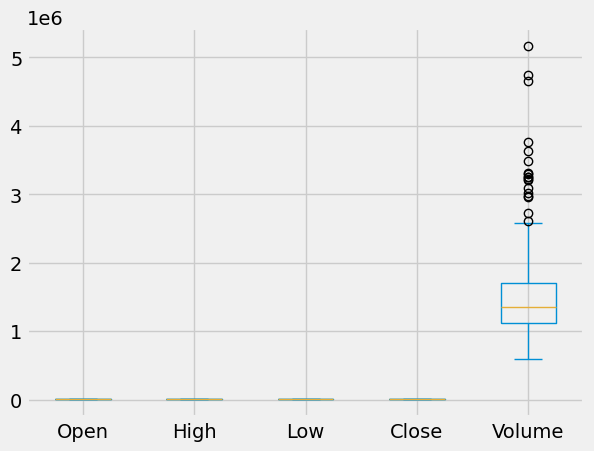

In [ ]:
google[['Open','High','Low','Close','Volume']].plot(kind='box')

<AxesSubplot:>

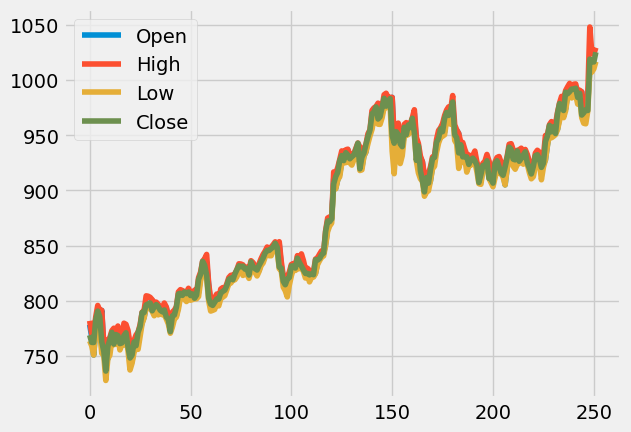

In [ ]:
google.plot(kind = "line", y = ['Open', 'High', 'Low','Close'])


# Create a new dataframe with only Close Column

In [ ]:
data = google.filter(['Close'])

# Convert the dataframe to numpy array

In [ ]:
dataset = data.values

# Train 80 percent of number of rows

In [ ]:
training_data_len = int(np.ceil( len(dataset) *0.8 ))

training_data_len

202

# Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard Deviation of processed data: ",scaled_data.std())

MEAN of processed data:  1.2406301735493812e-15
Standard Deviation of processed data:  0.9999999999999999


# Split the data into x_train and y_train

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]

In [ ]:
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])


# Convert the x_train and y_train to numpy arrays

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data - x_train

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(142, 60, 1)


# Build LSTM Model

In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(25))
model.add(Dense(1))

2023-06-07 01:29:11.250021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 01:29:11.251867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 01:29:11.253336: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

# Compile the model

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 50)                5050      
                                                                 
 dense_1 (Dense)             (None, 25)                1275      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 127,551
Trainable params: 127,551
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


2023-06-07 01:30:17.931152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 01:30:17.933237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 01:30:17.934455: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

5/5 [==============================] - 4s 99ms/step - loss: 0.3908
Epoch 2/10
5/5 [==============================] - 1s 105ms/step - loss: 0.1467
Epoch 3/10
5/5 [==============================] - 0s 92ms/step - loss: 0.1126
Epoch 4/10
5/5 [==============================] - 1s 103ms/step - loss: 0.0847
Epoch 5/10
5/5 [==============================] - 1s 127ms/step - loss: 0.0709
Epoch 6/10
5/5 [==============================] - 0s 95ms/step - loss: 0.0718
Epoch 7/10
5/5 [==============================] - 0s 95ms/step - loss: 0.0596
Epoch 8/10
5/5 [==============================] - 0s 92ms/step - loss: 0.0577
Epoch 9/10
5/5 [==============================] - 0s 98ms/step - loss: 0.0553
Epoch 10/10
5/5 [==============================] - 0s 93ms/step - loss: 0.0489


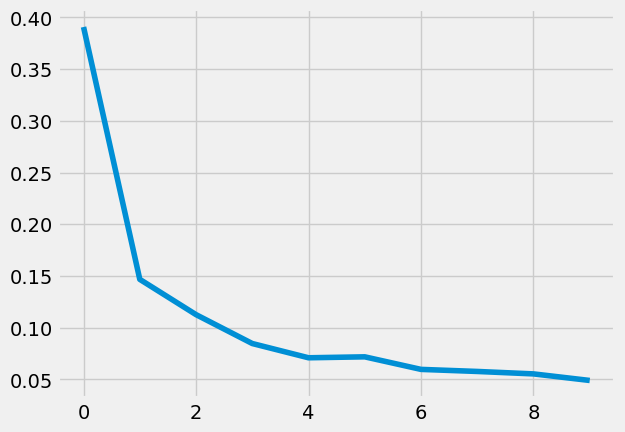

In [ ]:
plt.plot(history.history['loss'])

# Create the data - x_test and y_test

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]

In [ ]:
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


# Convert the data to a numpy array

In [ ]:
x_test = np.array(x_test)

# Reshape the data - x_test

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Evaluate the model


In [ ]:
train_loss = model.evaluate(x_train, y_train, verbose=0)
train_loss = model.evaluate(x_test, y_test, verbose=0)
print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {train_loss:.4f}")

2023-06-07 01:33:26.923614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 01:33:26.925397: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 01:33:26.926515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Train Loss: 910689.8125
Test Loss: 910689.8125


# Price Value Prediction

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2023-06-07 01:34:03.159186: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-07 01:34:03.160950: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-07 01:34:03.162280: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 1s 31ms/step


# Calculate RMSE

In [ ]:
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

18.630985460499907

# Plot the data

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

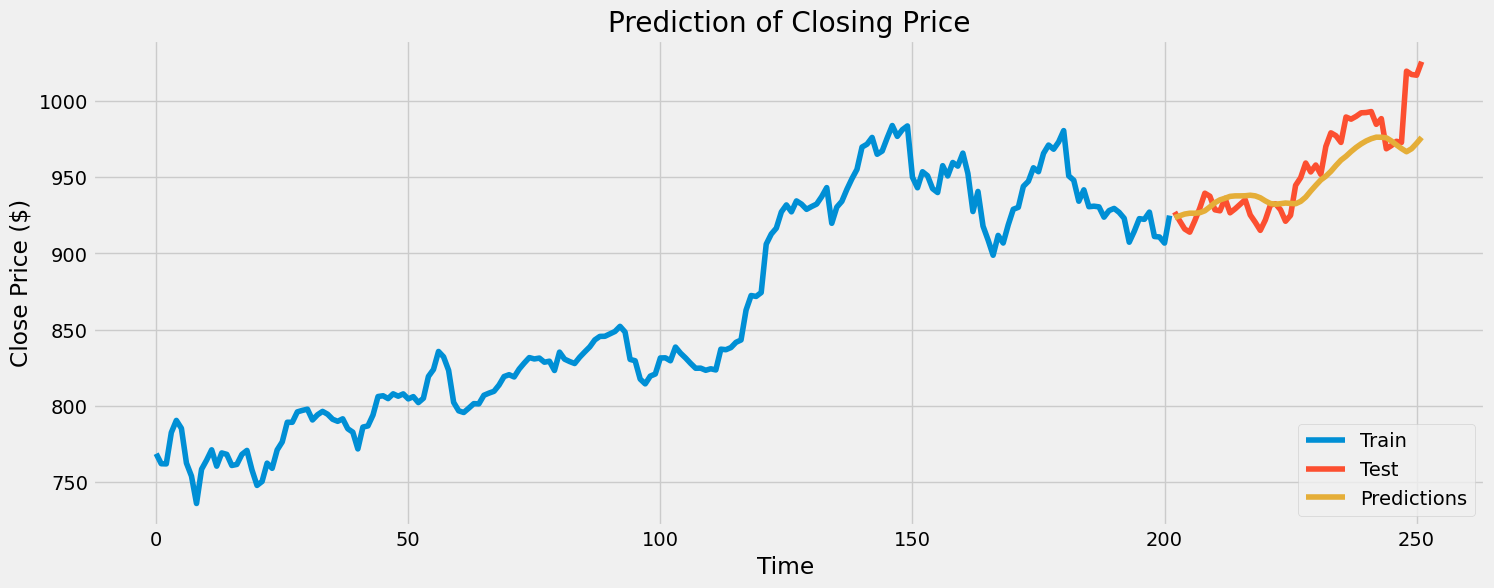

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Prediction of Closing Price')
plt.xlabel('Time ')
plt.ylabel('Close Price ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices

In [ ]:
valid

,Close,Predictions
202,927.000000,923.375061
203,921.280029,924.535706
204,915.890015,925.677490
205,913.809998,926.226685
206,921.289978,926.210510
207,929.570007,926.559326
208,939.330017,927.825256
209,937.340027,930.352966
210,928.450012,933.135864
211,927.809998,934.974548
